Bölüm 1: Veri Seti Seçimi ve Gerekçesi

İnsan psikolojisi ve sosyal medyanın arasındaki ilişkiyi merak ettiğim için bu veri setini seçtim

https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset

Amacım, Sosyal medyada kullanıcıların duygusal tepkilerini analiz etmek.


Bu veri seti, metin tabanlı duygusal analizler ve etkileşim davranışlarını incelemek için uygundur.


Gerekli Kütüphaneler yüklendi.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


file_path = 'sentimentdataset.csv'
data = pd.read_csv(file_path)

Bölüm 2: Veri Temizleme ve Dönüştürme
1. Gereksiz sütunların kaldırılması
2. Sütun isimlerinin düzenlenmesi
3. Tarih formatının uygun bir tipe dönüştürülmesi

Bu işlemler, analiz için veri setinin daha kullanışlı hale getirilmesini sağlar.

In [5]:
data_cleaned = data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], errors="ignore")
data_cleaned.columns = data_cleaned.columns.str.strip()
data_cleaned["Sentiment"] = data_cleaned["Sentiment"].str.strip()
data_cleaned["Text"] = data_cleaned["Text"].str.strip()
data_cleaned["Timestamp"] = pd.to_datetime(data_cleaned["Timestamp"], errors="coerce")

# Temizlenen veri setini inceleme
print(data_cleaned.info())
print(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    float64       
 7   Likes      732 non-null    float64       
 8   Country    732 non-null    object        
 9   Year       732 non-null    int64         
 10  Month      732 non-null    int64         
 11  Day        732 non-null    int64         
 12  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 74.5+ KB
None
                                          Text Sentiment           Timestamp  \
0        Enjoying a bea

Bölüm 3: Keşifsel Veri Analizi
Veri seti içindeki temel ilişkiler aşağıdaki analizlerle inceledim:
1. Sentiment dağılımı
2. Zaman bazlı gönderi sayısı
3. Sayısal sütunlar arasındaki korelasyon

Üç farklı model (KNN, SVM, Karar Ağacı) eğitilmiş ve test edilmiştir.

<ipython-input-6-dc097861ff61>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_sentiments.index, y=selected_sentiments.values, palette="viridis")


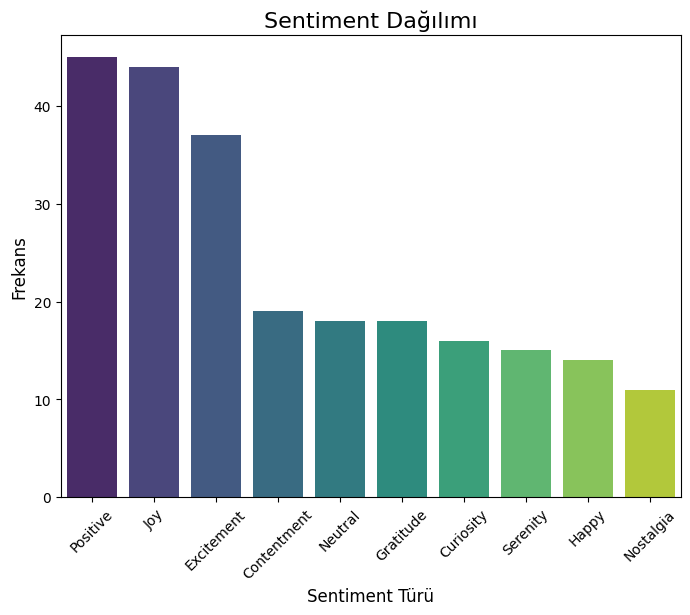

<ipython-input-6-dc097861ff61>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=data_cleaned, palette='coolwarm', order=range(1, 13))


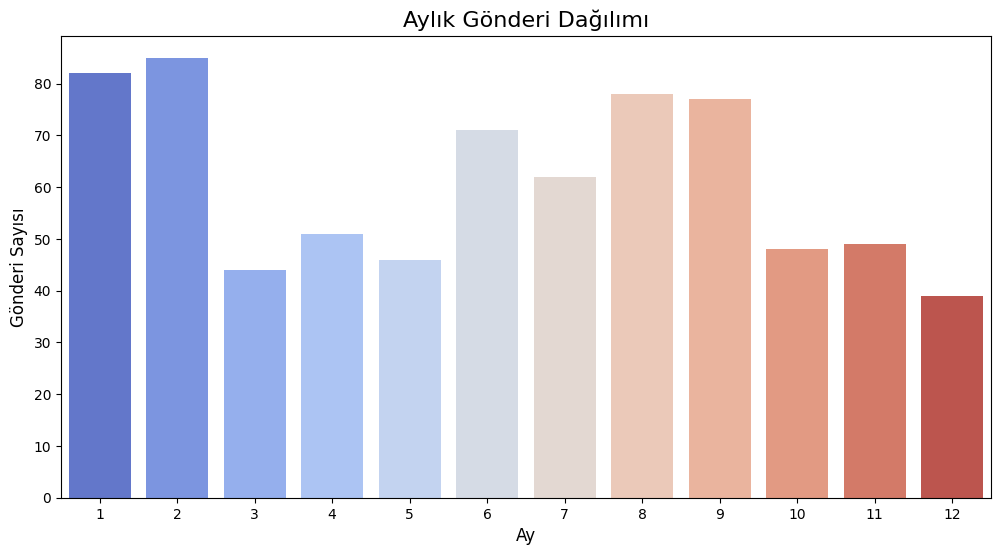

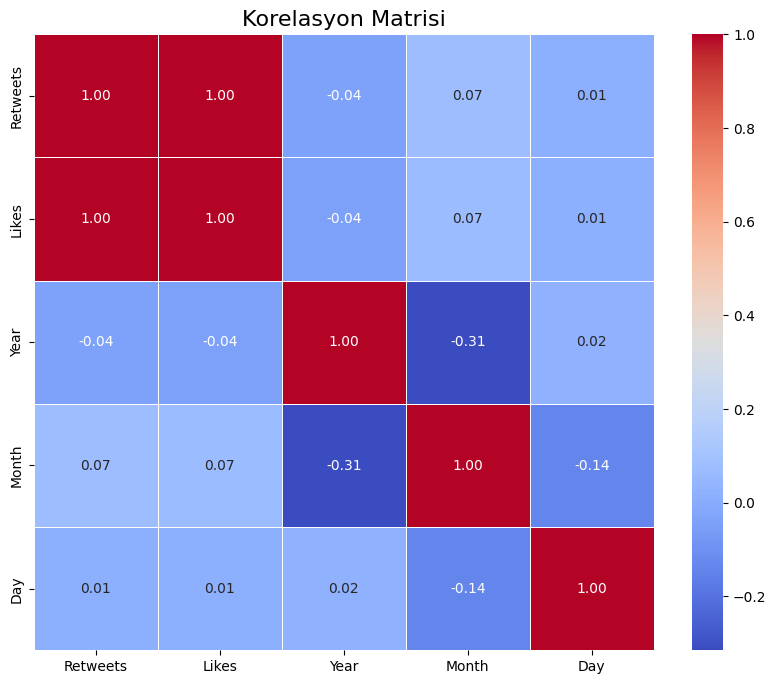

KNN Accuracy: 0.1360544217687075
SVM Accuracy: 0.4013605442176871
Decision Tree Accuracy: 0.3741496598639456

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       1.00      1.00      1.00         1
          19       0.50      0.33      0.40         3
          20       0.25      1.00      0.40         1
          21       0.00      0.00      0.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [6]:
# Sentiment dağılımı
sentiment_counts = data_cleaned["Sentiment"].value_counts()
selected_sentiments = sentiment_counts.head(10)  # En çok kullanılan ilk 10 sentiment
plt.figure(figsize=(8, 6))
sns.barplot(x=selected_sentiments.index, y=selected_sentiments.values, palette="viridis")
plt.title("Sentiment Dağılımı", fontsize=16)
plt.xlabel("Sentiment Türü", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Zaman bazlı gönderi sayısı
# Gönderilerin yıl, ay ve gün bazında dağılımı analiz edilmiştir.
data_cleaned['Year'] = data_cleaned['Timestamp'].dt.year
data_cleaned['Month'] = data_cleaned['Timestamp'].dt.month
data_cleaned['Day'] = data_cleaned['Timestamp'].dt.day
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=data_cleaned, palette='coolwarm', order=range(1, 13))
plt.title("Aylık Gönderi Dağılımı", fontsize=16)
plt.xlabel("Ay", fontsize=12)
plt.ylabel("Gönderi Sayısı", fontsize=12)
plt.show()

# Korelasyon matrisi
# Sayısal sütunlar arasındaki ilişkiler bir korelasyon matrisi ile görselleştirilmiştir.
correlation_matrix = data_cleaned[["Retweets", "Likes", "Year", "Month", "Day"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi", fontsize=16)
plt.show()

# Veri Hazırlığı
# Metin verisinin sayısallaştırılması ve hedef değişkenin kodlanması işlemleri yapılmıştır.
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
text_features = vectorizer.fit_transform(data_cleaned["Text"].fillna(""))

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data_cleaned["Sentiment"].fillna("Neutral"))

# Veri seti eğitim ve test olarak ayrıldı.
X_train, X_test, y_train, y_test = train_test_split(
    text_features, labels, test_size=0.2, random_state=42
)

# KNN Modeli
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# SVM Modeli
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Karar Ağacı Modeli
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Sınıflandırma raporları her bir model için oluşturulmuştur.
print("\nKNN Classification Report:\n", classification_report(y_test, knn_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

Bölüm 4: Veri Görselleştirme
1. Sentiment ve etkileşimler arasındaki ilişkiler
2. Aylık beğeni ortalamaları
3. Saatlik gönderi dağılımı
4. Sentiment ve beğeniler arasındaki ilişki
5. Retweet ve beğeniler arasındaki ilişki

<ipython-input-7-8d45045cb818>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sentiment", y="Likes", data=selected_sentiments_data, palette="Set3")


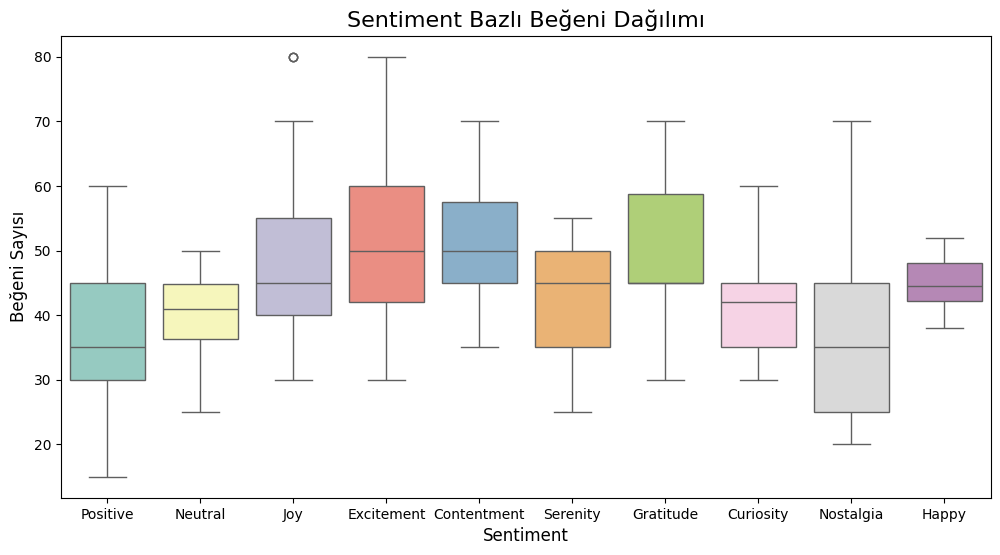

<ipython-input-7-8d45045cb818>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sentiment", y="Retweets", data=selected_sentiments_data, palette="Set2")


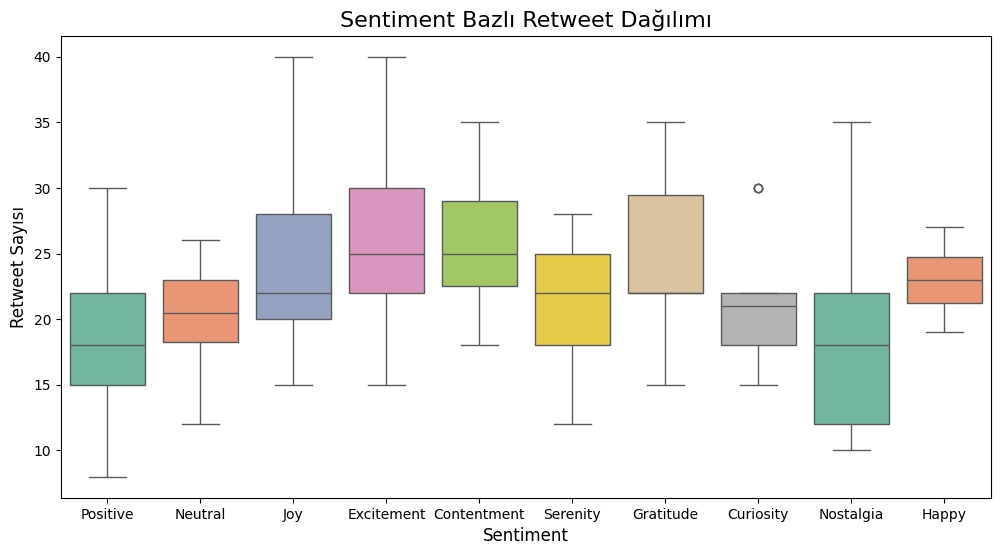

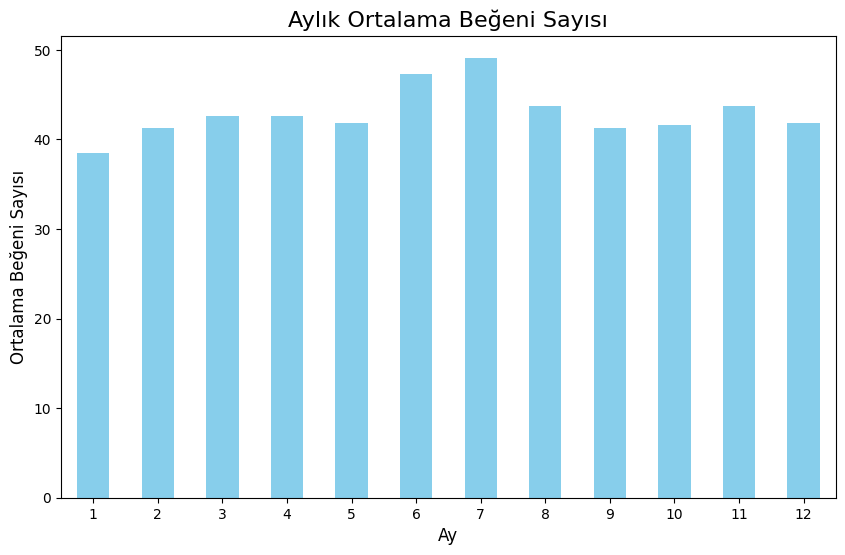

<ipython-input-7-8d45045cb818>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=data_cleaned, palette='viridis')


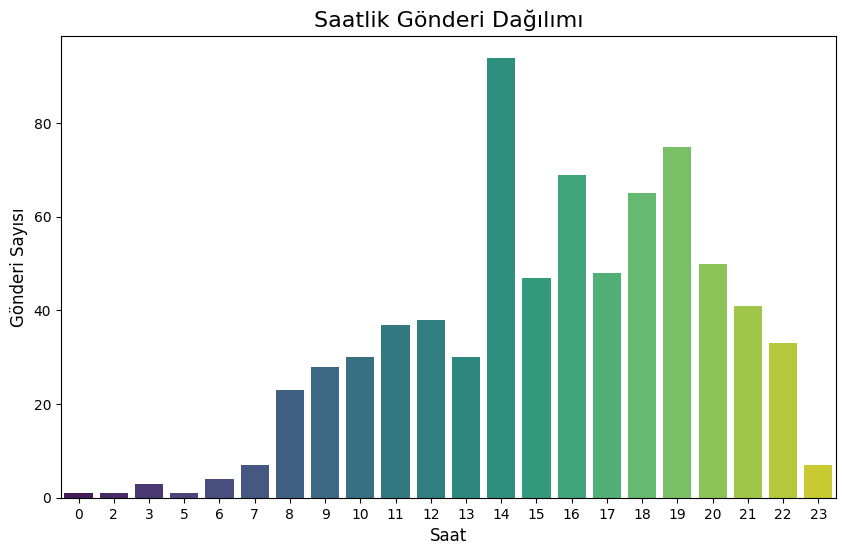

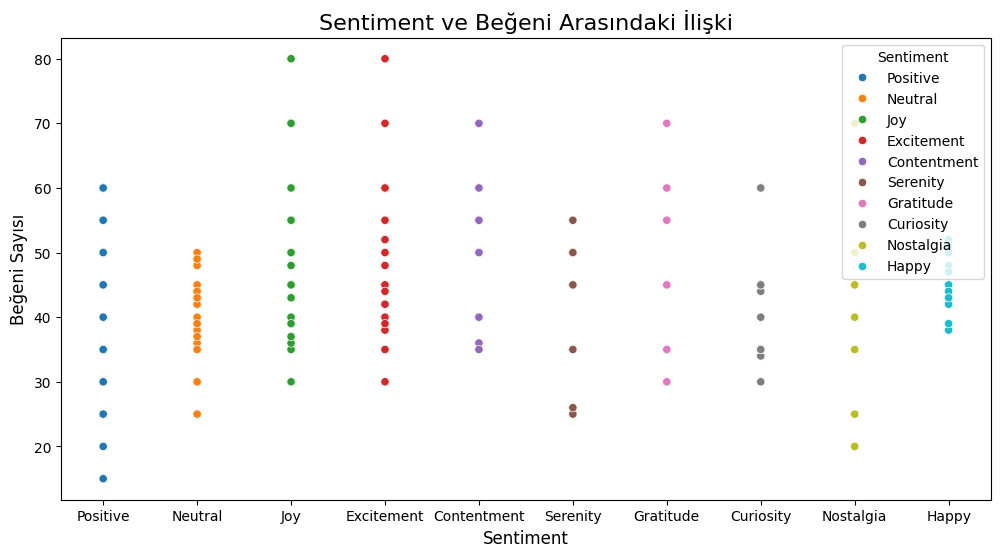

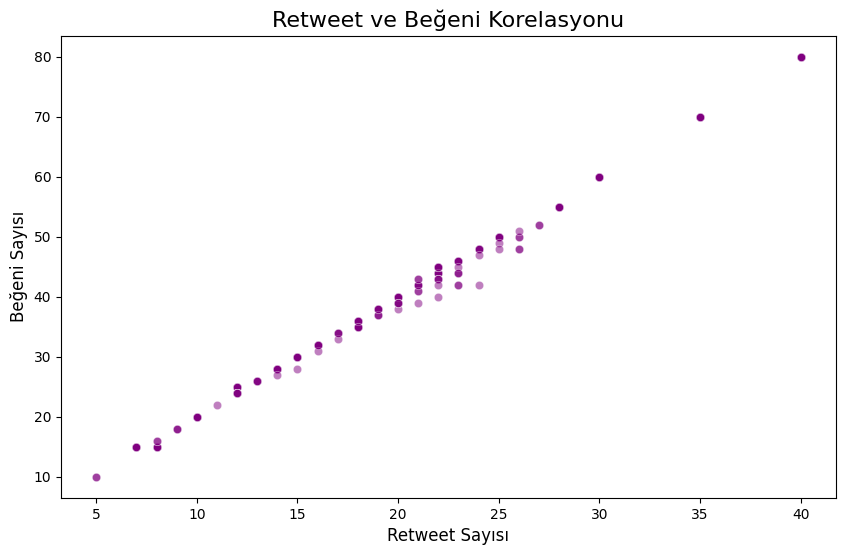

In [7]:
# Sentiment ve etkileşimler arasındaki ilişkiler görselleştirilmiştir.
selected_sentiments_data = data_cleaned[data_cleaned["Sentiment"].isin(selected_sentiments.index)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sentiment", y="Likes", data=selected_sentiments_data, palette="Set3")
plt.title("Sentiment Bazlı Beğeni Dağılımı", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Beğeni Sayısı", fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sentiment", y="Retweets", data=selected_sentiments_data, palette="Set2")
plt.title("Sentiment Bazlı Retweet Dağılımı", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Retweet Sayısı", fontsize=12)
plt.show()

# Aylık beğeni ortalamaları analiz edilmiştir.
monthly_likes = data_cleaned.groupby("Month")["Likes"].mean()
plt.figure(figsize=(10, 6))
monthly_likes.plot(kind="bar", color="skyblue")
plt.title("Aylık Ortalama Beğeni Sayısı", fontsize=16)
plt.xlabel("Ay", fontsize=12)
plt.ylabel("Ortalama Beğeni Sayısı", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Saatlik gönderi dağılımı analiz edilmiştir.
data_cleaned['Hour'] = data_cleaned['Timestamp'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data_cleaned, palette='viridis')
plt.title("Saatlik Gönderi Dağılımı", fontsize=16)
plt.xlabel("Saat", fontsize=12)
plt.ylabel("Gönderi Sayısı", fontsize=12)
plt.show()

# Sentiment ve beğeniler arasındaki ilişki görselleştirilmiştir.
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Sentiment", y="Likes", data=selected_sentiments_data, hue="Sentiment", palette="tab10")
plt.title("Sentiment ve Beğeni Arasındaki İlişki", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Beğeni Sayısı", fontsize=12)
plt.show()

# Retweet ve beğeniler arasındaki ilişki incelenmiştir.
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Retweets", y="Likes", data=data_cleaned, alpha=0.5, color="purple")
plt.title("Retweet ve Beğeni Korelasyonu", fontsize=16)
plt.xlabel("Retweet Sayısı", fontsize=12)
plt.ylabel("Beğeni Sayısı", fontsize=12)
plt.show()


Bölüm 5:Veri Hikayeleştirme
1. Sentiment bazlı beğeni grafiğinde Sakinlik ve Heyecanlanmak verisetine göre en çok beğenilen duygular.
2. Yine sentiment bazlı tweet grafiğinde ise Sakinlik ve Heyecanlanmak olmakla birlikte Memnuniyet duygusu da fazlasıyla olan duygular.
3. Aylık ortalama beğeni sayısı grafiğinde Yaz Aylarında daha fazla beğeni olduğu görülmüştür.
4. Saatlik gönderi dağılımında insanlar en çok 14:00 da ve 14-19 saatleri arasında daha fazla gönderi paylaştıkları görülmüştür.
5. Sentiment ve beğeni arası ilişkide, joy(neşe) ve excitement(heyecan) beğenilerde daha sık rastlanan duygular olmuştur.
6. Retweet Sayısı arttıkça beğeni sayısı arttığı görülmüştür.

Bölüm 6:Zorluklar ve Yansıma
1. Analiz sırasında veri temizleme, eksik verilerle başa çıkma ve metin verisi işleme gibi zorluklarla karşılaştım.
2. Farklı sınıflandırma modellerinin performansları değerlendirilirken fazlaca araştırma yaptım ve zorlandığım zamanlar oldu. Her modelin avantajını gözlemledim.
4. Araştırmalarım (github repoları, kaggle notebookları vb.)sonucu bu projeyi daha iyi yapabildiğimi düşünüyorum.
3. Bu süreç, bana veri bilimi ve yapay sinir ağları konularında uygulamalı bir öğrenme deneyimi sundu.
